# Multi-layer Perceptron (CUSTOM)

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

print("CURRENT TF VERSION IS [%s]" % (tf.__version__))
print("PACKAGES LOADED")

CURRENT TF VERSION IS [1.12.0]
PACKAGES LOADED


## Load dataset

In [2]:
# Load
cwd = os.getcwd()
data_name = "shape_images"
use_gray = 1

if use_gray:
    loadpath = cwd + "/data/" + data_name + "_gray.npz"
else:
    loadpath = cwd + "/data/" + data_name + "_rgb.npz"
print("Dataset loading from %s" % (loadpath))

shape_images = np.load(loadpath)
print(shape_images.files)

Dataset loading from /home/jwserver/문서/Files/shape_classification/data/shape_images_gray.npz
['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray', 'categories']


In [3]:
# Parse data
trainimg = shape_images['trainimg']
trainlabel = shape_images['trainlabel']
testimg = shape_images['testimg']
testlabel = shape_images['testlabel']
imgsize = shape_images['imgsize']
categories = shape_images['categories']
use_gray = shape_images['use_gray']

if use_gray:
    num_ch = 1
else:
    num_ch = 3

In [4]:
# Details
ntrain = trainimg.shape[0]
ntest = testimg.shape[0]
nclass = trainlabel.shape[1]
dim = trainimg.shape[1]

print("%d TRAIN IMAGES" % (ntrain))
print("%d TEST IMAGES" % (ntest))
print("%d DIMENSIONAL INPUT" % (dim))
print("%d CLASSES" % (nclass))
print(imgsize)
print(categories)

8982 TRAIN IMAGES
5988 TEST IMAGES
4096 DIMENSIONAL INPUT
4 CLASSES
[64 64]
['circle' 'square' 'star' 'triangle']


## Define Model

In [6]:
# Network Topologies
n_input = dim
n_hidden_1 = 256
n_hidden_2 = 128
n_classes = nclass

# Inputs and Outputs
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Network Parameters
stddev = 0.1
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

print("NETWORK READY")

NETWORK READY


## Define Graph

In [7]:
# Model
def multilayer_perceptron(_X, _weights, _biases):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, _weights['h2']), _biases['b2']))
    return tf.matmul(layer_2, _weights['out']) + _biases['out']

# Prediction
pred = multilayer_perceptron(x, weights, biases)

# Loss and Optimization
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
optm = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, "float"))

# Initializer
init = tf.global_variables_initializer()
print("FUNCTIONS READY")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

FUNCTIONS READY


## RUN

Epoch: 010/050 cost: 0.007301500
 TRAIN ACCURACY : 1.000
TEST ACCURACY : 0.999
3 MISSED


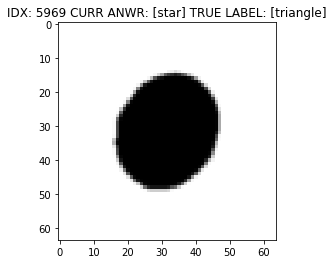

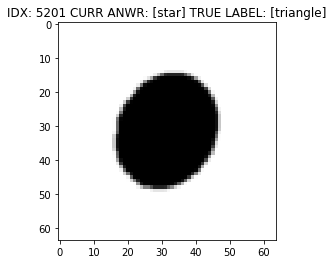

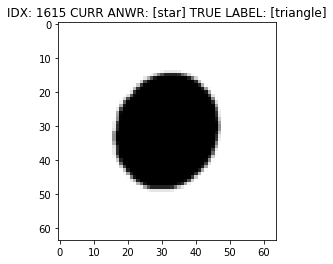

Epoch: 020/050 cost: 0.000658997
 TRAIN ACCURACY : 1.000
TEST ACCURACY : 1.000
0 MISSED
Epoch: 030/050 cost: 0.000246301
 TRAIN ACCURACY : 1.000
TEST ACCURACY : 1.000
0 MISSED
Epoch: 040/050 cost: 0.000125545
 TRAIN ACCURACY : 1.000
TEST ACCURACY : 1.000
0 MISSED
Epoch: 050/050 cost: 0.000069166
 TRAIN ACCURACY : 1.000
TEST ACCURACY : 1.000
0 MISSED


In [18]:
# Hyperparameters
training_epochs = 50
batch_size = 100
disp_each = 10
plot_each = 10

# Launch the Graph
sess = tf.Session()
sess.run(init)

# Optimize
for epoch in range(training_epochs):
    total_batch = int(ntrain/batch_size)
    randpermlist = np.random.permutation(ntrain)
    sun_cost = 0.
    
    for i in range(total_batch):
        randidx = randpermlist[i * batch_size: min((i+1) * batch_size, ntrain-1)]
        batch_xs = trainimg[randidx, :]
        batch_ys = trainlabel[randidx, :]
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm, feed_dict=feeds)
        sun_cost += sess.run(cost, feed_dict=feeds)
    
    avg_cost = sun_cost / total_batch
    
    
    # Display
    if (epoch+1) % disp_each == 0 or epoch == training_epochs - 1:
        print("Epoch: %03d/%03d cost: %.9f" % (epoch+1, training_epochs, avg_cost))
        feeds = {x: batch_xs, y:batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)
        print (" TRAIN ACCURACY : %.3f" % (train_acc))
        feeds = {x: testimg, y:testlabel}
        test_acc = sess.run(accr, feed_dict=feeds)
        print ("TEST ACCURACY : %.3f" % (test_acc))
                 
                 
     # Plot
    if (epoch+1) % plot_each == 0 or epoch == training_epochs-1:
        ntemp = int(ntest/batch_size) + 1
        missidxlist = []
        for ii in range(ntemp):
            iii = np.arange(ii*batch_size, min(ntest, (ii+1)*batch_size))
            feeds = {x: testimg[iii, :], y: testlabel[iii, :]}
            missidx = np.where(sess.run(corr, feed_dict=feeds) == 0)[0]
            missidxlist = np.concatenate((missidxlist, iii[missidx]))
        nmiss = len(missidxlist)
        print ("%d MISSED" % (nmiss))
        
        # PLOT MISSCLASSIFIED (UPTO THREE)
        missidxlist = np.random.permutation(missidxlist.astype(int))
        selmissidx = missidxlist[:min(3, nmiss)].astype(int)
        feeds_miss = {x: testimg[selmissidx, :], y: testlabel[selmissidx, :]}
        pred_miss = sess.run(pred, feed_dict=feeds_miss)
        answ_miss = np.argmax(pred_miss, 1)
        answ_corr = np.argmax(testlabel[selmissidx, :] ,1)
        
        for idx in range(len(selmissidx)):
            cidx = selmissidx[idx]
            anw = answ_miss[idx]
            ref = answ_corr[idx]
            if use_gray != 0:
                currimg = np.reshape(testimg[cidx, :], (imgsize[0], imgsize[1]))
                plt.imshow(currimg, cmap='gray')
            else :
                currimg = np.reshape(testimg[cidx, :], (imgsize[0], imgsize[1], -1))
                plt.imshow(currimg)
            anw_category = categories[anw]
            ref_category = categories[ref]
            title_string = ("IDX: %d CURR ANWR: [%s] TRUE LABEL: [%s]"
                    % (cidx, anw_category, ref_category))
            plt.title(title_string)
            plt.show()